In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()

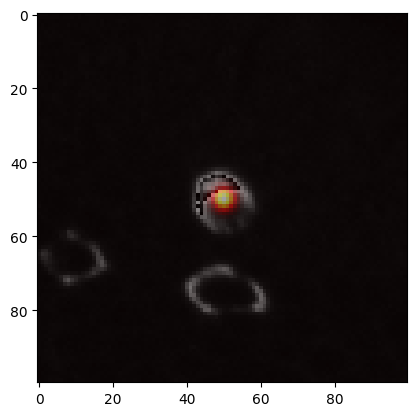

In [13]:
path_heatmap = cwd + '/data/patches/01_2/01_2_0006_heatmap.npy'
path_img = cwd + '/data/patches/01_2/01_2_0006.npy'

# Load the heatmap and image
heatmap = np.load(path_heatmap)
img = np.load(path_img)

# Normalize the heatmap in one line
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
img = (img - np.min(img)) / (np.max(img) - np.min(img))

plt.imshow(heatmap, cmap='hot')
plt.imshow(img, cmap='gray', alpha=0.5)
plt.show()